<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M3_531_Grovers_Search_One_Qubit_Representation_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Abuzer Yakaryilmaz_

<font size="28px" style="font-size:28px;" align="left"><b>Exercise: Grover's Search: One Qubit Representation </b></font>


##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1s5qKEvAT4Jx3lgK-nqERig-ba8TOEfqN#scrollTo=xkM_yjnNTakO' if in_colab() else 'QB42_Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task1')))
SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1s5qKEvAT4Jx3lgK-nqERig-ba8TOEfqN#scrollTo=3kZ-rE2BTakP' if in_colab() else 'QB42_Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task2')))
SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1s5qKEvAT4Jx3lgK-nqERig-ba8TOEfqN#scrollTo=ljHT0lgrTakP' if in_colab() else 'QB42_Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task3')))
SolutionToTask4 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1s5qKEvAT4Jx3lgK-nqERig-ba8TOEfqN#scrollTo=OHKCyIESTakP' if in_colab() else 'QB42_Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task4')))

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py"
    !wget --no-cache -O quantum.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py"
    !wget --no-cache -O drawing.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum_state.py"
    !wget --no-cache -O quantum_state.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/grover.py"
    !wget --no-cache -O grover.py {url}

--2025-06-15 21:53:19--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2760 (2.7K) [text/plain]
Saving to: ‘quantum.py’

quantum.py          100%[===================>]   2.70K  --.-KB/s    in 0s      

2025-06-15 21:53:19 (55.7 MB/s) - ‘quantum.py’ saved [2760/2760]

--2025-06-15 21:53:19--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6260 (6.1K) [text/plain]
Saving to: ‘drawing.py’

drawing.py          100%[===================>]   6.11K  --.-KB/s    in 0s      

2025-06-15 21:53:19 (91.1 MB/s) - 

#<h3> Task 1 </h3>

Execute Grover's search algorithm for 5 steps where $ N = 16 $ and the first element is marked.

Draw all quantum states on the unit circle during the execution.

Print the angle of each state in degree (use $\sin^{-1}$), and check whether there is any pattern for the oracle and inversion operators?

Is there any pattern for each step of Grover's algorithm?

In [2]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value
    return elements

<Figure size 640x480 with 0 Axes>

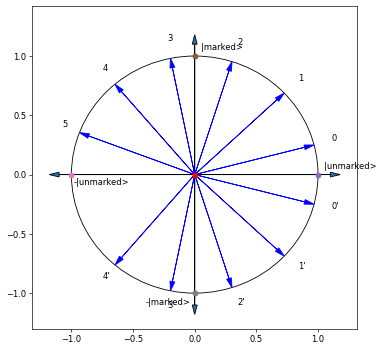

Angles in degrees:
14.477512185929923
-14.477512185929923
43.43253655778978
-43.43253655778978
72.38756092964962
-72.38756092964962
78.65741469849054
-78.65741469849054
49.702390326630685
-49.702390326630685
20.74736595477084


In [5]:
from math import asin, pi

# initial values
iteration = 5
N = 16
marked_elements = [0]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

x = elements[N-1] * ((N - k) ** 0.5)
y = elements[0] * (k ** 0.5)
states_on_unit_circle.append([x, y, "0"])

#
# your code is here
#
for step in range(iteration):
  elements = query(elements, marked_elements)
  x = elements[N - 1] * ((N - k) ** 0.5)
  y = elements[0] * (k ** 0.5)
  states_on_unit_circle.append([x, y, str(step) + "'"])
  elements = inversion(elements)
  x = elements[N - 1] * ((N - k) ** 0.5)
  y = elements[0] * (k ** 0.5)
  states_on_unit_circle.append([x, y, str(step + 1)])

quantum_file = path_files+"quantum.py"
%run $quantum_file

draw_qubit_grover()
for state in states_on_unit_circle: draw_quantum_state(state[0], state[1], state[2])
show_plt()

print("Angles in degrees:")
for state in states_on_unit_circle: print(asin(state[1]) * 180 / pi)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask1()  # show solution for task 1

<IPython.core.display.Javascript object>

<h3> Task 2 </h3>

In Task 1, after which step the probability of observing a marked element is the highest?

To check out our solution, run the next cell:

In [ ]:
SolutionToTask2()  # show solution for task 2

<h3> Task 3 </h3>

We have a list of size $ N = 128 $. We iterate Grover's search algorithm 10 steps.

Visually determine (i.e., Tasks 1 & 2) the good number of iterations if the number of marked elements is 1, 2, 4, or 8. (The quantum state on the unit circle should be close to the $y$-axis.)

In [6]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value
    return elements

<Figure size 640x480 with 0 Axes>

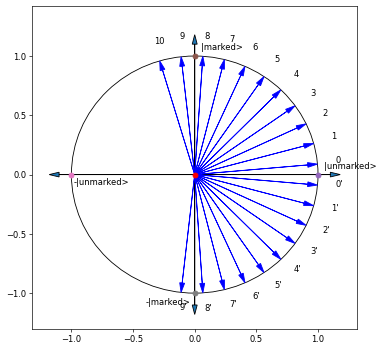

Angles in degrees:
5.070896682839932
-5.070896682839932
15.212690048519809
-15.212690048519809
25.354483414199702
-25.354483414199702
35.496276779879594
-35.496276779879594
45.63807014555948
-45.63807014555948
55.77986351123941
-55.77986351123941
65.9216568769194
-65.9216568769194
76.06345024259952
-76.06345024259952
86.2052436082811
-86.2052436082811
83.6529630260427
-83.6529630260427
73.51116966036199


In [7]:
from math import asin, pi

# initial values
iteration = 10
N = 128
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# your code is here
#
x = elements[N - 1] * ((N - k) ** 0.5)
y = elements[0] * (k ** 0.5)
states_on_unit_circle.append([x, y, "0"])

for step in range(iteration):
  elements = query(elements, marked_elements)
  x = elements[N - 1] * ((N - k) ** 0.5)
  y = elements[0] * (k ** 0.5)
  states_on_unit_circle.append([x, y, str(step) + "'"])
  elements = inversion(elements)
  x = elements[N - 1] * ((N - k) ** 0.5)
  y = elements[0] * (k ** 0.5)
  states_on_unit_circle.append([x, y, str(step + 1)])

quantum_file = path_files+"quantum.py"
%run $quantum_file
draw_qubit_grover()
for state in states_on_unit_circle: draw_quantum_state(state[0], state[1], state[2])
show_plt()

print("Angles in degrees:")
for state in states_on_unit_circle: print(asin(state[1]) * 180 / pi)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask3()  # show solution for task 3

<h3> Task 4 </h3>

We have a list of size $ N = 256 $. We iterate Grover's search algorithm 20 (or 10) steps.

Visually determine (i.e., Tasks 1 & 2) the good number of iterations if the number of marked elements is 1, 2, 4, or 8. (The quantum state on the unit circle should be close to the $y$-axis.)

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value
    return elements

<Figure size 640x480 with 0 Axes>

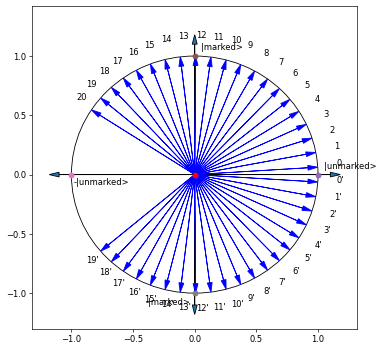

Angles in degrees:
3.583321698471973
-3.583321698471973
10.74996509541592
-10.74996509541592
17.916608492359867
-17.916608492359867
25.08325188930381
-25.08325188930381
32.24989528624776
-32.24989528624776
39.4165386831917
-39.4165386831917
46.58318208013565
-46.58318208013565
53.74982547707959
-53.74982547707959
60.91646887402354
-60.91646887402354
68.08311227096745
-68.08311227096745
75.2497556679113
-75.2497556679113
82.41639906485496
-82.41639906485496
89.58304246178932
-89.58304246178932
83.25031414125607
-83.25031414125607
76.08367074431253
-76.08367074431253
68.91702734736872
-68.91702734736872
61.750383950424855
-61.750383950424855
54.583740553480936
-54.583740553480936
47.417097156536975
-47.417097156536975
40.25045375959301
-40.25045375959301
33.08381036264909


In [8]:
from math import asin, pi

# initial values
iteration = 20
N = 256
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# your code is here
#
x = elements[N - 1] * ((N - k) ** 0.5)
y = elements[0] * (k ** 0.5)
states_on_unit_circle.append([x, y, "0"])

for step in range(iteration):
  elements = query(elements, marked_elements)
  x = elements[N - 1] * ((N - k) ** 0.5)
  y = elements[0] * (k ** 0.5)
  states_on_unit_circle.append([x, y, str(step) + "'"])
  elements = inversion(elements)
  x = elements[N - 1] * ((N - k) ** 0.5)
  y = elements[0] * (k ** 0.5)
  states_on_unit_circle.append([x, y, str(step + 1)])

quantum_file = path_files+"quantum.py"
%run $quantum_file
draw_qubit_grover()
for state in states_on_unit_circle: draw_quantum_state(state[0], state[1], state[2])
show_plt()

print("Angles in degrees:")
for state in states_on_unit_circle: print(asin(state[1]) * 180 / pi)

To check out our solution, run the next cell:

In [ ]:
SolutionToTask4()  # show solution for task 4

<IPython.core.display.Javascript object>